<a href="https://colab.research.google.com/github/timlongfield/Snapchat_Filters/blob/main/background_removal_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import statements
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Parameters
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
# Adjust BGR values here for different color backgrounds
MASK_COLOR_YELLOW = (0.0,1.0,1.0) # BGR Yellow
MASK_COLOR_RED = (0.0, 0.0, 1.0) # BGR Red
MASK_COLOR_BLUE = (1.0, 0.0, 0.0) #BGR Blue


In [ ]:
# Download my image
!wget https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg -O jax.png

--2021-12-20 21:37:41--  https://i.postimg.cc/XNCmwyM2/IMG-2959.jpg
Resolving i.postimg.cc (i.postimg.cc)... 104.238.220.13
Connecting to i.postimg.cc (i.postimg.cc)|104.238.220.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96512 (94K) [image/jpeg]
Saving to: ‘jax.png’

jax.png             100%[===================>]  94.25K  --.-KB/s    in 0.1s    

2021-12-20 21:37:42 (633 KB/s) - ‘jax.png’ saved [96512/96512]



In [ ]:
# Read Image
img = cv2.imread('jax.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
# Edge Detection
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

In [ ]:
# Finding contour within image
contour_info = []
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

for c in contours:
    contour_info.append((c,cv2.isContourConvex(c),cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

In [ ]:
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3) # 3 Chanelle for RGB

In [ ]:
# Blend masked image into background color
mask_stack = mask_stack.astype('float32') / 255.0        
img = img.astype('float32') / 255.0              

In [ ]:
# Yellow
masked_y = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR_YELLOW) 
masked_y = (masked_y * 255).astype('uint8')  

In [ ]:
# Red
masked_r = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR_RED) 
masked_r = (masked_r * 255).astype('uint8')  

In [ ]:
# Yellow
masked_b = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR_BLUE) 
masked_b = (masked_b * 255).astype('uint8')  

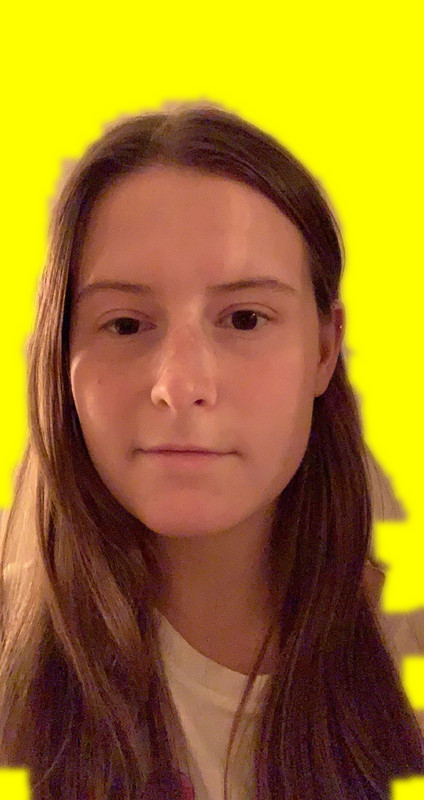

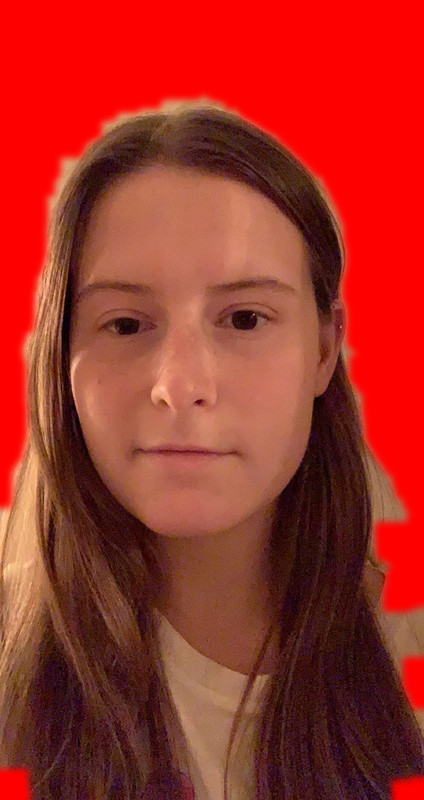

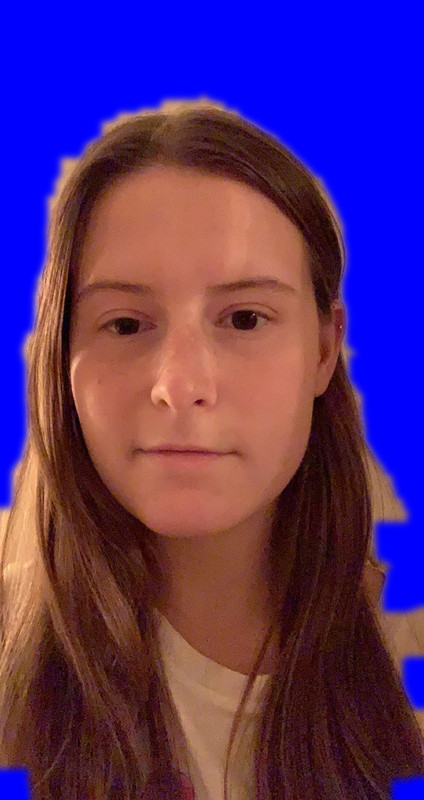

-1

In [ ]:
# Print Image
cv2_imshow(masked_y)
cv2_imshow(masked_r)
cv2_imshow(masked_b)
cv2.waitKey()